In [10]:
#Miniproject Python for Data Science
#Edx Uni of San Diego - Christian Castaneda - Feb/2020


In [1]:
#import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl

In [2]:
#read data
data = pd.read_csv('./world-development-indicators/Indicators.csv')


In [3]:
###Next blocks prepare pivoted dataframe I use for analysis
#creates dataframes for different metrics.
#I ended up with 3 dataframes, a b and c. I found it easier to explore the data this way while searching for a question.
country = 'European Union'
metric1 = 'Labor force with tertiary education (% of total)'
metric2 = 'Patent applications, residents'
metric3 = 'Scientific and technical journal articles'

mask1 = data['IndicatorName'] == metric1
mask2 = data['CountryName'] == country
df_a = data[mask1 & mask2]

mask1 = data['IndicatorName'] == metric2
mask2 = data['CountryName'] == country
df_b = data[mask1 & mask2]

mask1 = data['IndicatorName'] == metric3
mask2 = data['CountryName'] == country
df_c = data[mask1 & mask2]

#create dataframe from previous dataframes a, b and c
df_metric_1 = df_a.append(df_b)
df_metric_1 = df_metric_1.append(df_c)

#pivot dataframe
pivoted = pd.pivot_table(df_metric_1, values='Value', index=['Year'], columns=['IndicatorName'], aggfunc=np.sum)
pivoted = pivoted.dropna()
pivoted = pivoted.reset_index()

In [4]:
#rename columns to shorter names. for personal preference.
pivoted.rename(columns={"Labor force with tertiary education (% of total)": "percent_tiertary", 
                        "Patent applications, residents":"patents",
                        "Scientific and technical journal articles": "articles"}, inplace=True)

In [5]:
###Next blocks prepare the plot based on pivoted dataframe.
#prepare variables for graph.
t = pivoted['Year'].values
a = pivoted['percent_tiertary'].values
b = pivoted['patents'].values
c = pivoted['articles'].values


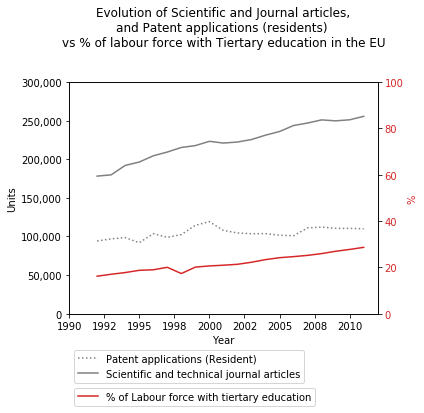

In [6]:
###Next blocks prepare the plot based on pivoted dataframe.
#prepare variables for graph.
t = pivoted['Year'].values
a = pivoted['percent_tiertary'].values
b = pivoted['patents'].values
c = pivoted['articles'].values

fig, ax1 = plt.subplots()

#Two data sets that share a primary axis (in units)
color = 'black'
ax1.set_xlabel('Year')
ax1.set_ylabel("Units", color=color)
ax1.plot(t,b, color='gray', label='Patent applications (Resident)', linestyle='dotted')
ax1.plot(t,c, color='gray', label='Scientific and technical journal articles')
ax1.tick_params(axis='y', labelcolor=color)
ax1.axis([1990, 2012, 0, 300000])

#adds commas to thousands, and removes decimals from years.
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0f}'))

#One data set using a second axis (in percentage %)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('%', color=color)
ax2.plot(t, a, color=color, label='% of Labour force with tiertary education')
ax2.tick_params(axis='y', labelcolor=color)
ax2.axis([1990, 2012, 0, 100])
fig.tight_layout()

#add final formating to the graph
plt.title('Evolution of Scientific and Journal articles,\nand Patent applications (residents) \nvs % of labour force with Tiertary education in the EU\n\n')
ax1.legend(loc="lower left", bbox_to_anchor=(0,-0.32))
ax2.legend(loc="lower left", bbox_to_anchor=(0,-0.42))
#ax.legend(bbox_to_anchor=(1.1, 1.05))

#show final graph
plt.show()

In [9]:
#explore correlation
pivoted.corr()

IndicatorName,Year,percent_tiertary,patents,articles
IndicatorName,,,,
Year,1.000000,0.979407,0.609801,0.982631
percent_tiertary,0.979407,1.000000,0.556477,0.948561
patents,0.609801,0.556477,1.000000,0.668129
articles,0.982631,0.948561,0.668129,1.000000
